<a href="https://colab.research.google.com/github/Sneha2266/ML-Project/blob/main/crop_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLEANING**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/crop_yield 1.csv')

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [ ]:
df.shape

(19689, 10)

In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968400e+04,1.968700e+04,19688.000000,1.968800e+04,1.968700e+04,19689.000000
mean,2009.127584,1.799281e+05,1.643761e+07,1437.793279,2.410447e+07,4.885296e+04,79.954009
std,6.498099,7.329077e+05,2.630702e+08,816.912840,9.494828e+07,2.132977e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.392000e+03,940.700000,1.880082e+05,3.566800e+02,0.600000
50%,2010.000000,9.316500e+03,1.380400e+04,1247.600000,1.234625e+06,2.421900e+03,1.030000
75%,2015.000000,7.511900e+04,1.227410e+05,1643.700000,1.000514e+07,2.004722e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19688 non-null  object 
 3   State            19685 non-null  object 
 4   Area             19684 non-null  float64
 5   Production       19687 non-null  float64
 6   Annual_Rainfall  19688 non-null  float64
 7   Fertilizer       19688 non-null  float64
 8   Pesticide        19687 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-" * 20)

Column: Crop
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']
--------------------
Column: Crop_Year
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
--------------------
Column: Season
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ' nan]
--------------------

In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,1
State,4
Area,5
Production,2
Annual_Rainfall,1
Fertilizer,1
Pesticide,2
Yield,0


In [ ]:
# Fill numerical null values with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical null values with the mode
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)




<ipython-input-51-2ef02ca2f9df>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-51-2ef02ca2f9df>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.shape

(19689, 10)

In [ ]:
df.duplicated().sum()



0

In [ ]:
df.duplicated().sum()

0

# **LABEL ENCODING**

In [ ]:


# Initialize separate LabelEncoders for each categorical column
le_crop = LabelEncoder()
le_season = LabelEncoder()
le_state = LabelEncoder()
from sklearn.preprocessing import LabelEncoder
# Apply encoding to each categorical column separately
le_crop.fit(df['Crop'])
df['Crop'] = le_crop.transform(df['Crop'])

le_season.fit(df['Season'])
df['Season'] = le_season.transform(df['Season'])

le_state.fit(df['State'])
df['State'] = le_state.transform(df['State'])


categorical_cols = []  # Add any additional categorical columns if needed
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  float64
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 1.5 MB


# **correlation**

In [ ]:
pd.set_option('display.max_rows', None)
correlation = df.corr(numeric_only=True)['Yield']
print(correlation)

Crop              -0.110894
Crop_Year          0.002539
Season             0.141798
State              0.009664
Area               0.001858
Production         0.570808
Annual_Rainfall    0.020757
Fertilizer         0.002861
Pesticide          0.001780
Yield              1.000000
Name: Yield, dtype: float64


# **Define features and target variable**

In [ ]:

from sklearn.model_selection import train_test_split

x = df.drop('Yield', axis=1)
feature_order = x.columns
y = df['Yield']


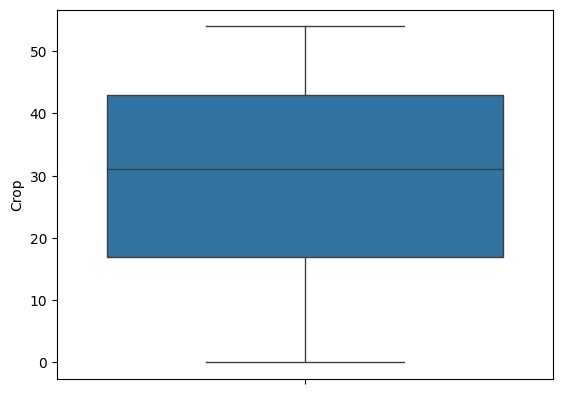

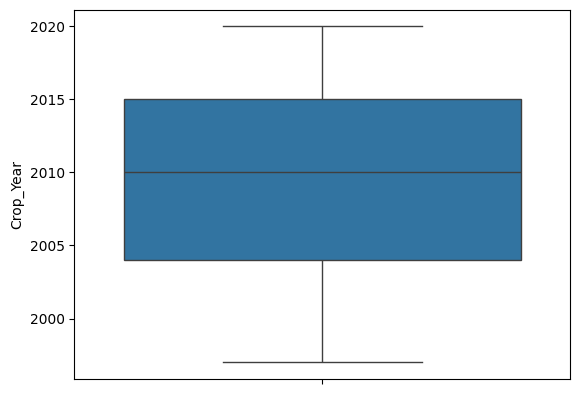

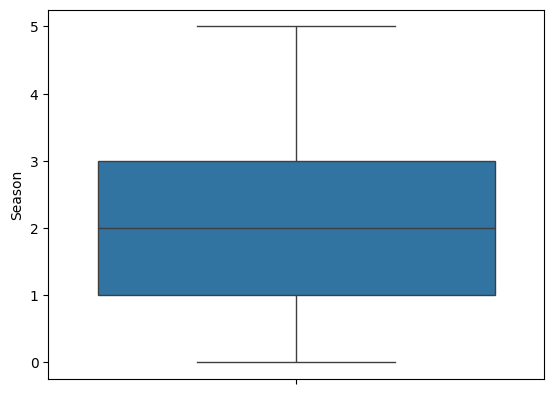

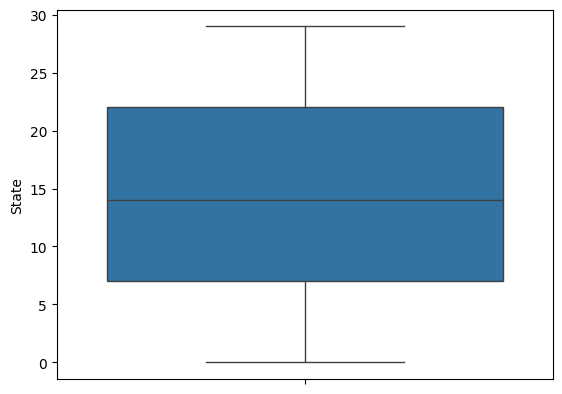

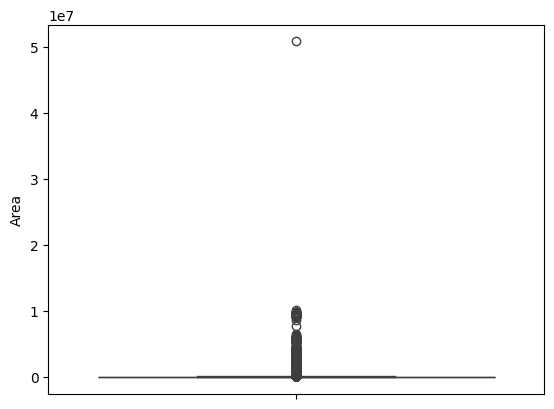

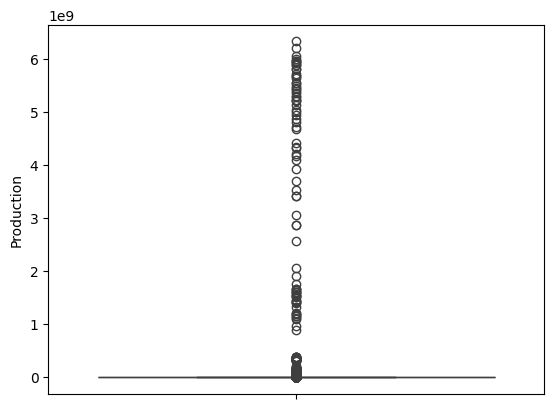

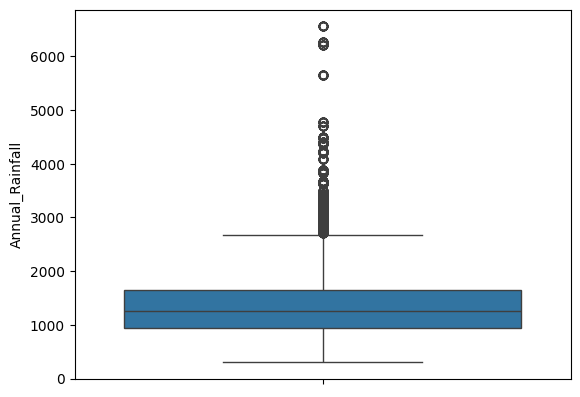

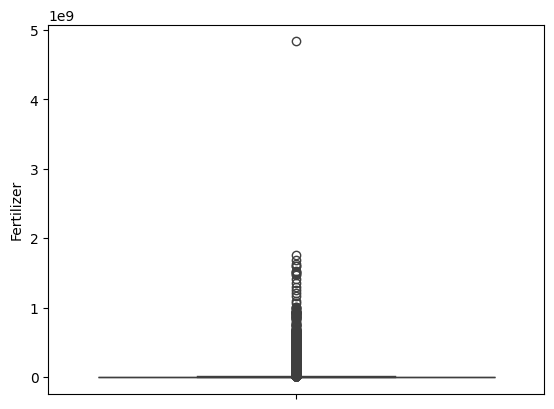

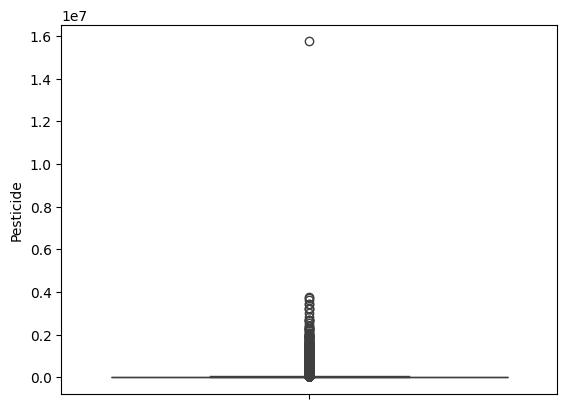

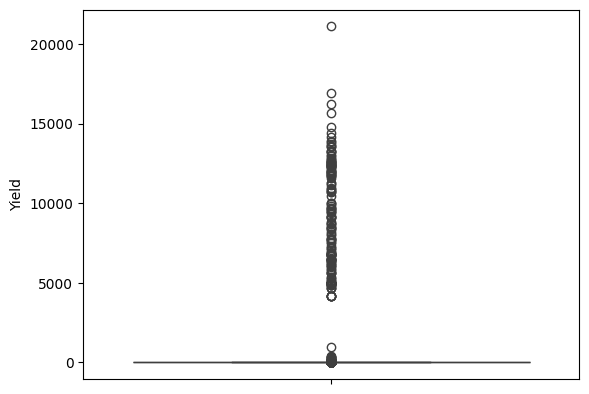

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

# **Split data into training and testing sets**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)  #train and evaluate

# **Feature Scaling using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
xtrain_scaled = sd.fit_transform(xtrain)
xtest_scaled = sd.transform(xtest)

# **KNN MODEL**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=7,metric='euclidean')
knn.fit(xtrain_scaled,ytrain)


KNeighborsRegressor(metric='euclidean', n_neighbors=7)

In [ ]:
ypredknn=knn.predict(xtest_scaled)      #The model finds the 7 nearest neighbors for each test point and averages their target values to generate the predictions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, ypredknn)
mae = mean_absolute_error(ytest, ypredknn)
r2 = r2_score(ytest, ypredknn)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 152637.74032717358
Mean Absolute Error: 35.30614462362646
R-squared: 0.8094980704128274


In [ ]:
from math import sqrt
rmse=sqrt(mse)
rmse

390.6888024082256

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [ ]:
clf1=KNeighborsRegressor()

In [ ]:
params={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'metric':['euclidean','manhattan'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}
clf=RandomizedSearchCV(clf1,params,cv=10,scoring='r2')
clf.fit(xtrain,ytrain)


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [ ]:
clf.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 3,
 'metric': 'manhattan',
 'algorithm': 'ball_tree'}

In [ ]:
knn_best = KNeighborsRegressor(
    weights='uniform',
    p=2,
    n_neighbors=11,
    metric='manhattan',
    algorithm='brute'
)

In [ ]:
knn_best.fit(xtrain_scaled, ytrain)
y_pred_best = knn_best.predict(xtest_scaled)
mse_best = mean_squared_error(ytest, y_pred_best)
rmse_best = sqrt(mse_best)
r2_best = r2_score(ytest, y_pred_best)
print(f"Mean Squared Error (Best KNN): {mse_best}")
print(f"Root Mean Squared Error (Best KNN): {rmse_best}")
print(f"R-squared (Best KNN): {r2_best}")

Mean Squared Error (Best KNN): 107865.23949475234
Root Mean Squared Error (Best KNN): 328.42843892506073
R-squared (Best KNN): 0.8653770934037167


In [ ]:
training_score=knn_best.score(xtrain_scaled,ytrain)
testing_score=knn_best.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8858206774266784
Testing Score: 0.8653770934037167


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.90889109 0.88483906 0.97903834 0.59338385 0.92917167]
Mean CV Score: 0.8590648008715099



# **DECISION TREE REGRESSOR**




In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain_scaled,ytrain)

DecisionTreeRegressor()

In [ ]:
ypreddec=dt.predict(xtest_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(ytest, ypreddec)
mae = mean_absolute_error(ytest, ypreddec)
r2 = r2_score(ytest, ypreddec)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 109935.2599674204
Mean Absolute Error: 12.824385766493654
R-squared: 0.8627935718350473


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2')
random_search.fit(xtrain_scaled, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='r2')

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new DecisionTreeRegressor with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)

# Fit the optimized model to the training data
best_dt_model.fit(xtrain_scaled, ytrain)

# Make predictions on the test data
y_pred_best = best_dt_model.predict(xtest_scaled)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

mse_best = mean_squared_error(ytest, y_pred_best)
r2_best = r2_score(ytest, y_pred_best)

print(f"Mean Squared Error (Best DT): {mse_best}")
print(f"R-squared (Best DT): {r2_best}")

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'friedman_mse'}
Mean Squared Error (Best DT): 51703.63976153927
R-squared (Best DT): 0.9354704601880182


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(xtrain_scaled,ytrain)

training_score=dt.score(xtrain_scaled,ytrain)
testing_score=dt.score(xtest_scaled,ytest)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 0.868357126547939


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.93621753 0.96079446 0.99476916 0.60797106 0.56643032]
Mean CV Score: 0.8132365059472999


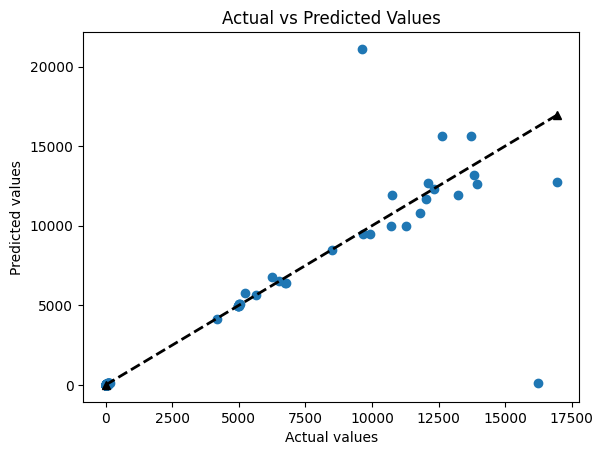

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypreddec)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain_scaled,ytrain)

RandomForestRegressor()

In [ ]:
ypreddec=dt.predict(xtest_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(ytest, ypreddec)
mae = mean_absolute_error(ytest, ypreddec)
r2 = r2_score(ytest, ypreddec)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 105477.51814085388
Mean Absolute Error: 11.878782648553832
R-squared: 0.868357126547939


In [ ]:
from scipy.stats import randint as sp_randint

In [ ]:
clff = RandomForestRegressor()
params = {
    'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],

    'max_features': sp_randint(1, 11),
    'min_samples_split': sp_randint(2, 11),
    'criterion': ['squared_error', 'poisson', 'friedman_mse', 'absolute_error']
}

randomcv = RandomizedSearchCV(clff, param_distributions=params, cv=5, random_state=42,error_score='raise')
randomcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson', 'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95e24bf890>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b95e24bfcd0>,
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50]},
                   random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc1=RandomForestRegressor(n_estimators=20,max_depth=15,max_features=9)
rfc1.fit(xtrain_scaled,ytrain)

RandomForestRegressor(max_depth=15, max_features=9, n_estimators=20)

In [ ]:
ypreddd=rfc1.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypreddd))
print(mean_squared_error(ytest,ypreddd))
print(r2_score(ytest,ypreddd))

10.123236651185152
74584.10049146478
0.9069141417470384


In [ ]:
training_score=rfc1.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=rfc1.score(xtest_scaled,ytest)
print(testing_score)

0.9874189691315772
0.9069141417470384


# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain_scaled,ytrain)

LinearRegression()

In [ ]:
ypredlre=lr.predict(xtest_scaled)
ypredlre

array([-49.67649184,  83.54233728, 210.17355996, ..., 262.05833638,
       225.14450739,  34.64531389])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_absolute_error(ytest,ypredlre))
print(mean_squared_error(ytest,ypredlre))
print(r2_score(ytest,ypredlre))

139.4565054139401
480233.1250186924
0.4006375043836259


# **ADABOOST REGRESSOR DECISION TREEE**

In [ ]:
from  sklearn.ensemble import AdaBoostRegressor
adaboost=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),n_estimators=100)
print(adaboost.estimator)

DecisionTreeRegressor(max_depth=6)


In [ ]:
adaboost.fit(xtrain_scaled,ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=100)

In [ ]:
ypredada1=adaboost.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypredada1))
print(mean_squared_error(ytest,ypredada1))
print(r2_score(ytest,ypredada1))

13.29616318267542
76783.76620128419
0.9041688144035575


In [ ]:
training_score=adaboost.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=adaboost.score(xtest_scaled,ytest)
print(testing_score)

0.998551157740671
0.9041688144035575


# **ADABOOST REGRESSOR LINEAR REGRESSION**

In [ ]:
adaboost2=AdaBoostRegressor(estimator=LinearRegression(),n_estimators=100)
adaboost2.fit(xtrain_scaled,ytrain)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [ ]:
ypredada2=adaboost2.predict(xtest_scaled)

In [ ]:
print(mean_absolute_error(ytest,ypredada2))
print(mean_squared_error(ytest,ypredada2))
print(r2_score(ytest,ypredada2))

1095.8745720058575
2180180.465468955
-1.7210084781775077


In [ ]:
training_score=adaboost2.score(xtrain_scaled,ytrain)
print(training_score)
testing_score=adaboost2.score(xtest_scaled,ytest)
print(testing_score)

-1.8130374500210777
-1.7210084781775077


# **SVR MODEL**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr3=SVR(kernel='poly')
svr3.fit(xtrain_scaled,ytrain)

SVR(kernel='poly')

In [ ]:
ypred4=svr3.predict(xtest_scaled)
ypred4

array([1.07514921, 1.33500585, 3.34053644, ..., 0.68971509, 3.25009444,
       1.25934344])

In [ ]:
print(mean_absolute_error(ytest,ypred4))
print(mean_squared_error(ytest,ypred4))
print(r2_score(ytest,ypred4))

56.18214705748956
527284.830230241
0.3419138845635604


In [ ]:
import pickle

In [ ]:
pickle.dump(knn_best,open('KNNMODEL.sav','wb'))
pickle.dump(sd,open('SD.sav','wb'))
pickle.dump(le_crop,open('le_crop.sav','wb'))
pickle.dump(le_season,open('le_season.sav','wb'))
pickle.dump(le_state,open('le_state.sav','wb'))


In [ ]:
pip list